In [1]:
import pandas as pd

In [2]:
%time data = pd.read_csv("./restaurant.csv", delimiter=",", index_col=0)

Wall time: 46.9 ms


In [3]:
data.sample(5)

,Order Name,Order Date,Quantity,Rating,Price,Total Price
Order ID,,,,,,
1431,Chicken Eggstra,26/07/2019 17:46,1,"4,78",12527,12527
5321,Chicken Eggstra,05/08/2017 20:51,1,"2,98",31884,31884
2235,Avocado Juice,20/03/2019 18:24,3,"5,85",14043,42129
7443,Caramel Macchiato,23/04/2019 19:51,7,"1,90",21098,147686
3555,Chicken Eggstra,24/08/2018 18:48,9,"5,57",19987,179883


In [4]:
data.describe()

,Quantity,Price,Total Price
count,11001.000000,11001.000000,11001.000000
mean,5.532770,22280.487410,123413.204345
std,2.870864,7165.508202,78080.044909
min,1.000000,10002.000000,10013.000000
25%,3.000000,16007.000000,60594.000000
50%,6.000000,22327.000000,110383.000000
75%,8.000000,28357.000000,173727.000000
max,10.000000,35000.000000,349830.000000


In [5]:
total = data.isnull().sum().sort_values(ascending=False)

percent = (data.isnull().sum()/data.isnull().count()) \
.sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, \
                        keys=['Total', 'Missing Percent'])

missing_data['Missing Percent'] = \
missing_data['Missing Percent'].apply(lambda x: x*100)

missing_data.loc[missing_data['Missing Percent'] > 10] [:10]

,Total,Missing Percent


In [6]:
total

Total Price    0
Price          0
Rating         0
Quantity       0
Order Date     0
Order Name     0
dtype: int64

In [7]:
missing_data

,Total,Missing Percent
Total Price,0,0.0
Price,0,0.0
Rating,0,0.0
Quantity,0,0.0
Order Date,0,0.0
Order Name,0,0.0


In [8]:
missing_data.loc[missing_data['Missing Percent'] > 10] [:10]

,Total,Missing Percent


In [9]:
import pandas_profiling

In [10]:
data_resto = pd.read_csv('./restaurant.csv')
profile = data_resto.profile_report(title='Pandas Profiling Report')
profile.to_file(output_file="resto_pandas_profiling.html")

### Seaborn

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

In [12]:
import seaborn as sns

In [13]:
restaurant = pd.read_csv('./restaurant.csv')

In [14]:
restaurant.shape

(11001, 7)

In [15]:
restaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11001 entries, 0 to 11000
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Order ID     11001 non-null  int64 
 1   Order Name   11001 non-null  object
 2   Order Date   11001 non-null  object
 3   Quantity     11001 non-null  int64 
 4   Rating       11001 non-null  object
 5   Price        11001 non-null  int64 
 6   Total Price  11001 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 601.7+ KB


### Menganalisis Variabel Secara Individual

In [16]:
numerical_vars = ['Order Date','Quantity','Rating','Price','Total Price']
categorical_vars = ['Order Name']

In [17]:
restaurant = restaurant[numerical_vars+categorical_vars]

In [18]:
restaurant.shape

(11001, 6)

### Memahami Variabel Utama

In [19]:
restaurant['Order Name'].describe()

count                 11001
unique                  114
top       Caramel Macchiato
freq                   3598
Name: Order Name, dtype: object

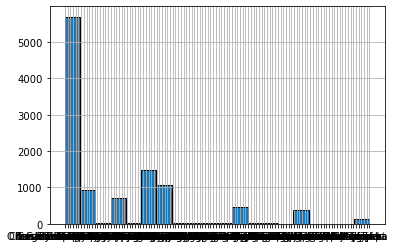

In [20]:
restaurant['Order Name'].hist(edgecolor='black',bins=20);

### Variabel Numerikal

In [21]:
restaurant[numerical_vars].describe()

,Quantity,Price,Total Price
count,11001.000000,11001.000000,11001.000000
mean,5.532770,22280.487410,123413.204345
std,2.870864,7165.508202,78080.044909
min,1.000000,10002.000000,10013.000000
25%,3.000000,16007.000000,60594.000000
50%,6.000000,22327.000000,110383.000000
75%,8.000000,28357.000000,173727.000000
max,10.000000,35000.000000,349830.000000


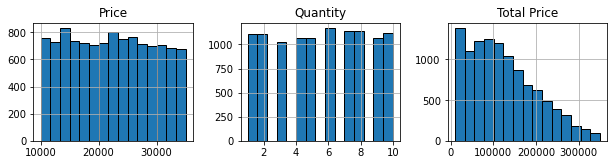

In [22]:
restaurant[numerical_vars].hist(edgecolor='black',bins=15, figsize=(14,5), layout=(2,4));

### Variabel Kategorikal

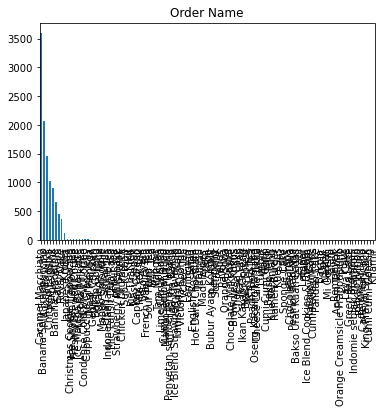

In [23]:
restaurant['Order Name'].value_counts().plot(kind='bar', title='Order Name')

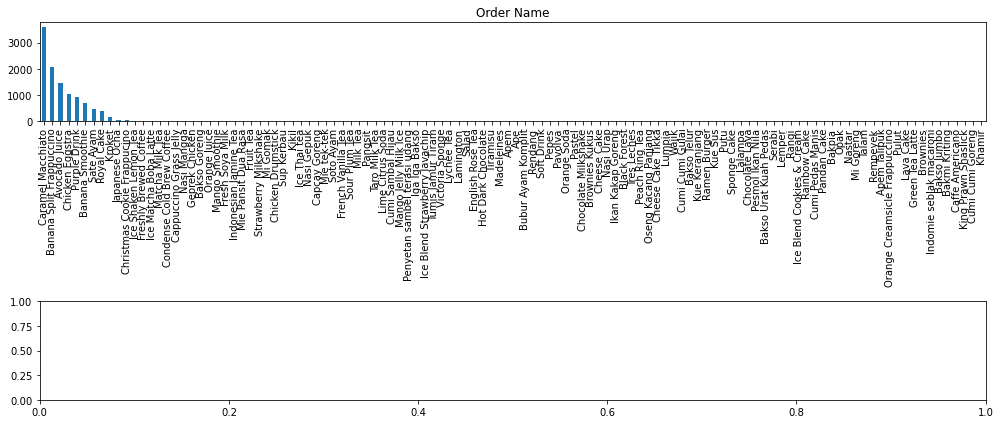

In [24]:
fig, ax = plt.subplots(2,1, figsize=(14,6))
for var, subplot in zip(categorical_vars, ax.flatten()):
    restaurant[var].value_counts().plot(kind='bar', ax=subplot, title=var)
    
fig.tight_layout()

In [25]:
def identify_cat_above50(series):
    counts = series.value_counts()
    return list(counts[counts>=50].index)

In [26]:
levels_to_keep = restaurant[categorical_vars].apply(identify_cat_above50, axis=0)
levels_to_keep

Order Name    [Caramel Macchiato, Banana Split Frappuccino, ...
dtype: object

In [27]:
for var in categorical_vars:
    restaurant = restaurant.loc[restaurant[var].isin(levels_to_keep[var])]

In [28]:
restaurant.shape

(10682, 6)

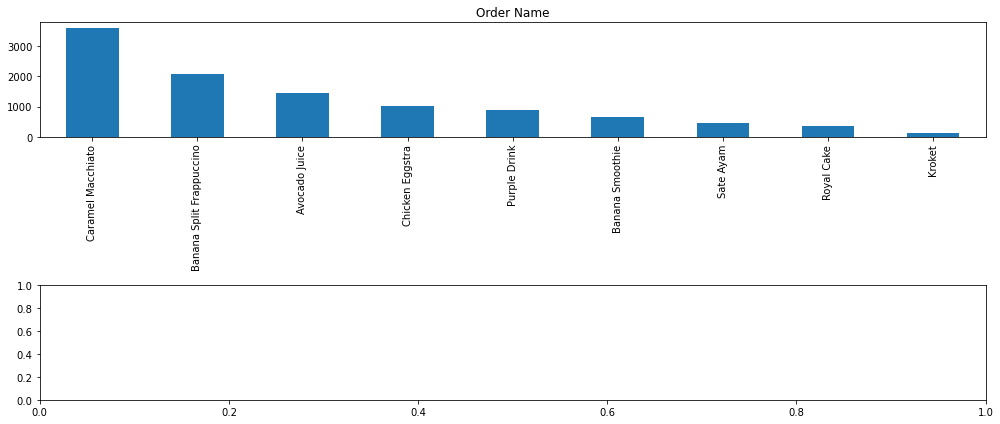

In [29]:
fig, ax = plt.subplots(2,1, figsize=(14,6))
for var, subplot in zip(categorical_vars, ax.flatten()):
    restaurant[var].value_counts().plot(kind='bar', ax=subplot, title=var)
    
fig.tight_layout()

## Hubungan antar Variabel dengan Scatter Plot

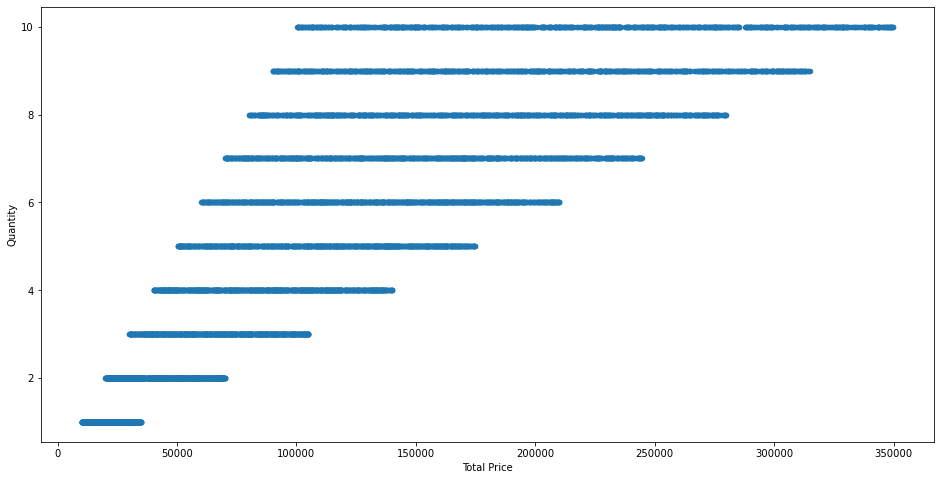

In [30]:
restaurant.plot.scatter(figsize=(16,8), x='Total Price', y='Quantity')

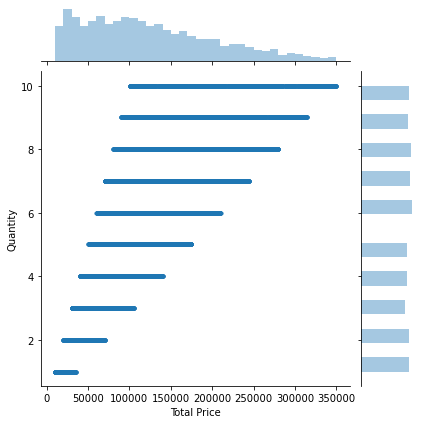

In [31]:
sns.jointplot(x='Total Price', y='Quantity', data=restaurant, joint_kws={"s": 10});

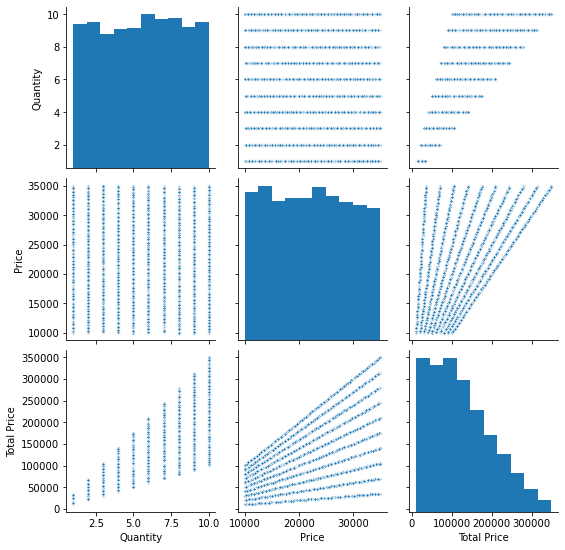

In [32]:
sns.pairplot(restaurant[numerical_vars[:5]],plot_kws={"s":10});

In [46]:
restaurant[numerical_vars].corr()

,Quantity,Price,Total Price
Quantity,1.000000,0.004738,0.820067
Price,0.004738,1.000000,0.511250
Total Price,0.820067,0.511250,1.000000


In [47]:
restaurant[numerical_vars].corr()['Total Price'].sort_values(ascending=False)

Total Price    1.000000
Quantity       0.820067
Price          0.511250
Name: Total Price, dtype: float64

In [48]:
correlations = restaurant[numerical_vars].corr()

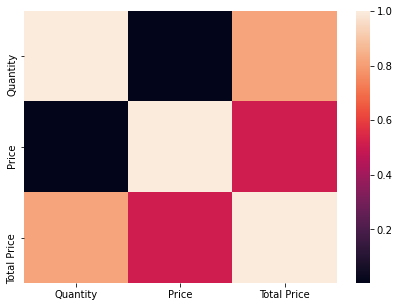

In [49]:
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(correlations, ax=ax);

## Hubungan Antara Variabel dengan Bloxpot

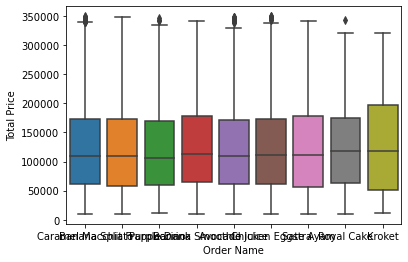

In [36]:
sns.boxplot(x='Order Name', y='Total Price', data=restaurant);

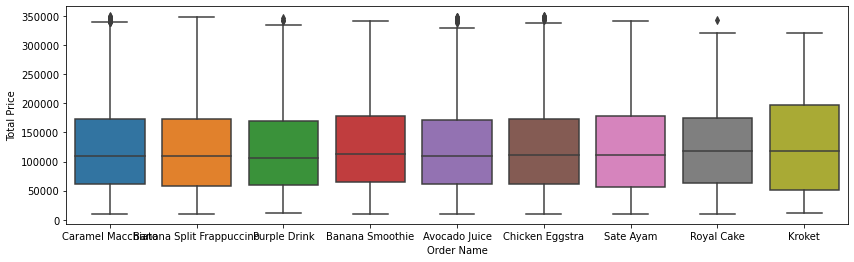

In [41]:
fig, ax = plt.subplots(figsize=(14,4))
sns.boxplot(x='Order Name', y='Total Price', data=restaurant, ax=ax);

In [44]:
sorted_nb = restaurant.groupby('Order Name')['Total Price'].median().sort_values().index.values

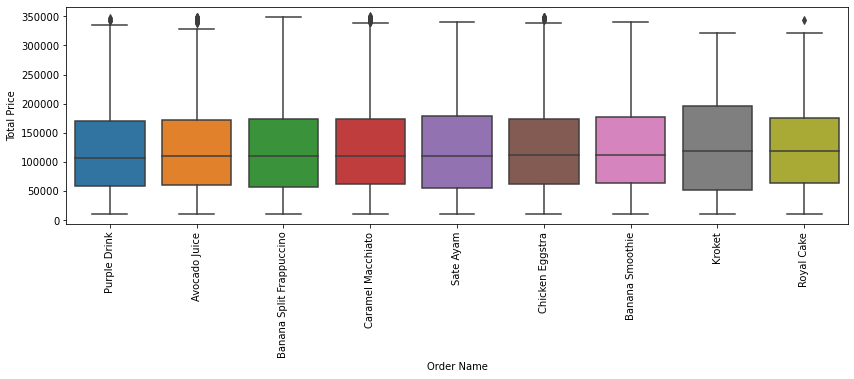

In [45]:
fig, ax = plt.subplots(figsize=(14,4))
sns.boxplot(x='Order Name', y='Total Price', data=restaurant, order=sorted_nb, ax=ax)
plt.xticks(rotation='vertical');